<a href="https://colab.research.google.com/github/YuseokYang/Study-Everyday/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#데이터셋을 로드
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S


In [3]:
# 각 Column의 결측치와 데이터 타입 확인
# Cabin은 결측치가 아주 많아 분석에 부적절하므로 제외
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Column의 통계값 확인
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.isnull().sum() #각 column의 결측치 확인

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
#Cabin의 결측치가 너무 많아 분석에 필요없음 drop
df_train.drop('Cabin', axis=1, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
#추후 머신러닝 시 사용하는 test 데이터에도 train과 동일한 상태를 유지
df_test.drop('Cabin', axis=1, inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


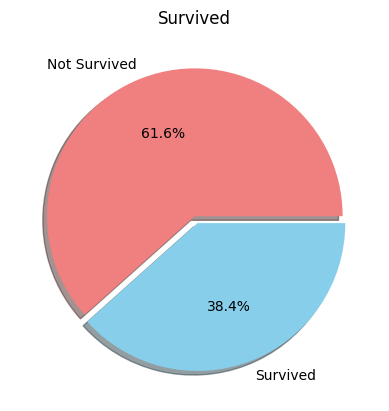

In [8]:
#생존자의 비율을 pie plot으로 표현
survived = df_train['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
colors = ['lightcoral', 'skyblue']

plt.pie(survived, labels=labels, colors=colors, autopct='%1.1f%%', explode=[0,0.05], shadow=True)
plt.title('Survived')
plt.show()

In [9]:
# Pclass(객식의 등급 별 생존자 수를 표현)
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [10]:
# crosstab으로 등급별 생존률을 표현
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


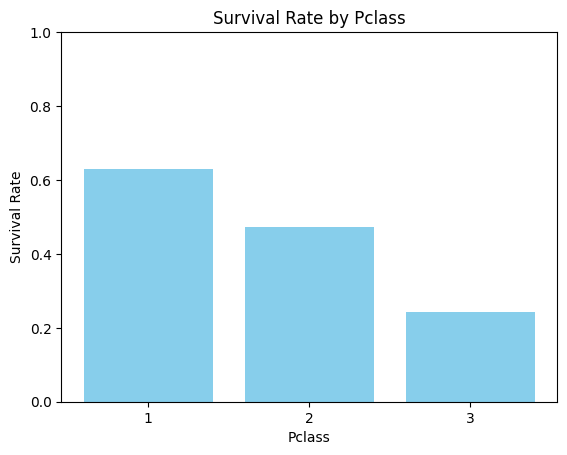

In [11]:
# Pclass가 높을 수록 생존률이 높은 것을 bar plot으로 확인
Pclass_survived = df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
plt.bar(Pclass_survived.index, Pclass_survived['Survived'], color='skyblue')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.ylim(0,1)
plt.xticks([1,2,3])
plt.show()

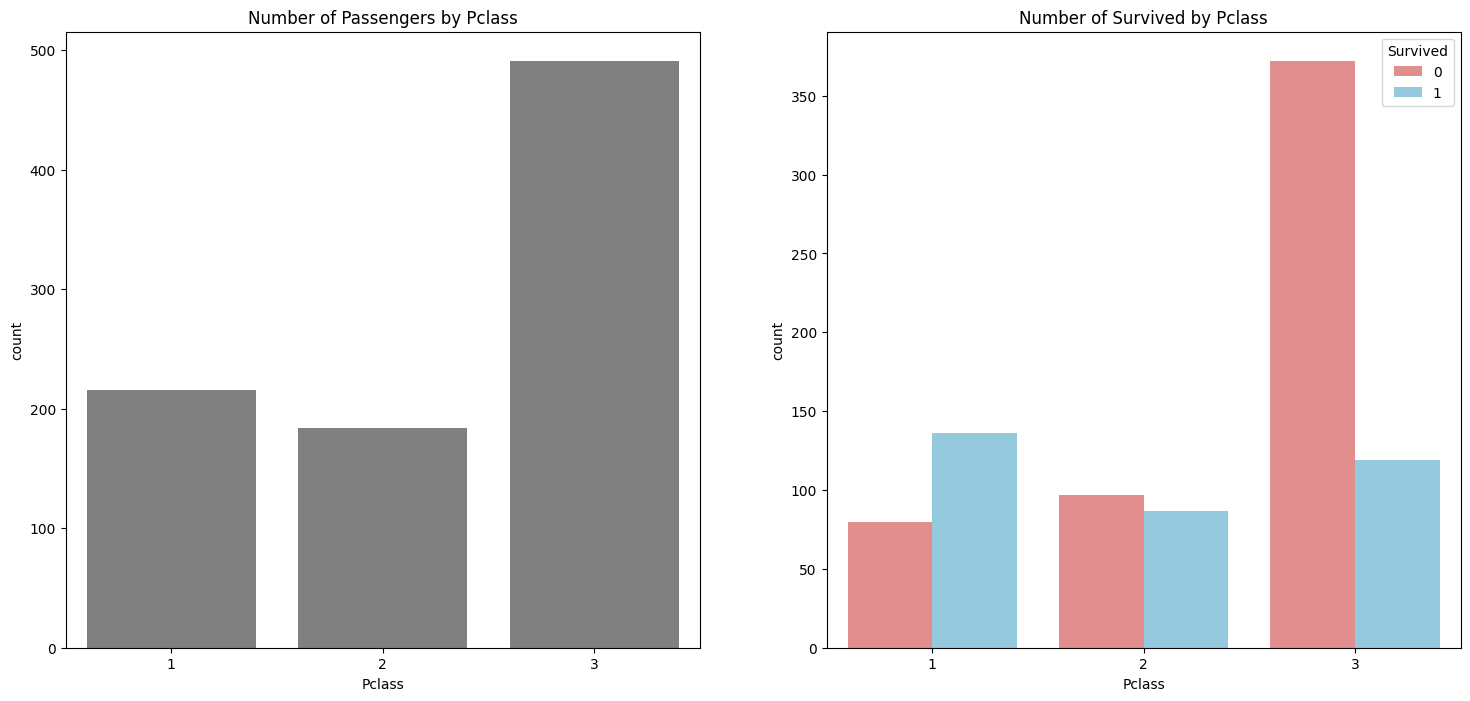

In [12]:
# Pclass 별 탑승 인원과 사망,생존 비율을 확인
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.countplot(x='Pclass', data=df_train, ax=ax[0], color='gray')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1], palette={0:'lightcoral', 1:'skyblue'})
ax[0].set_title('Number of Passengers by Pclass')
ax[1].set_title('Number of Survived by Pclass')
plt.show()

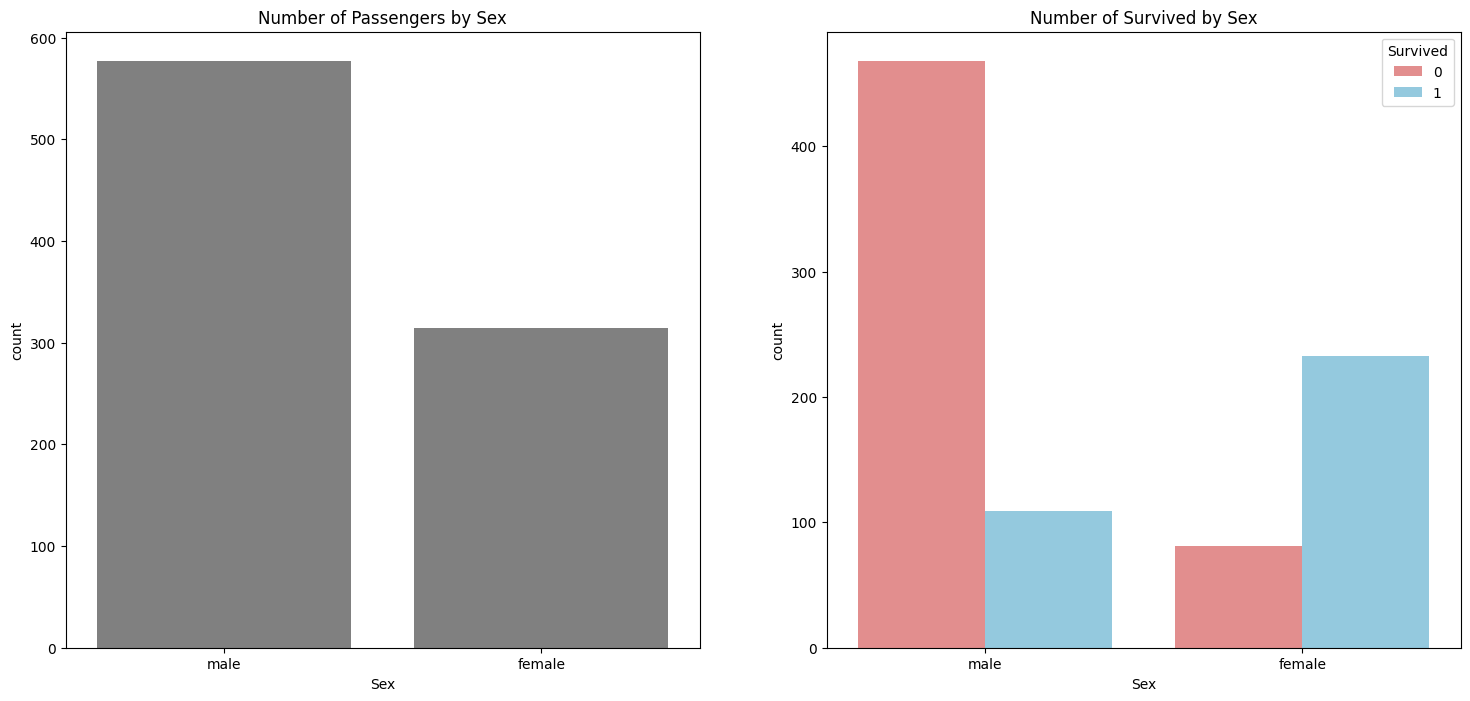

In [13]:
# 성별에 따른 탑승객 수와 생존 비율을 시각화
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.countplot(x='Sex', data=df_train, ax=ax[0], color='gray')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1], palette={0:'lightcoral', 1:'skyblue'})
ax[0].set_title('Number of Passengers by Sex')
ax[1].set_title('Number of Survived by Sex')
plt.show()

In [14]:
#성별에 따른 생존률
df_train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
#성별에 따른 생존 비율
pd.crosstab(index=df_train['Sex'], columns=df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


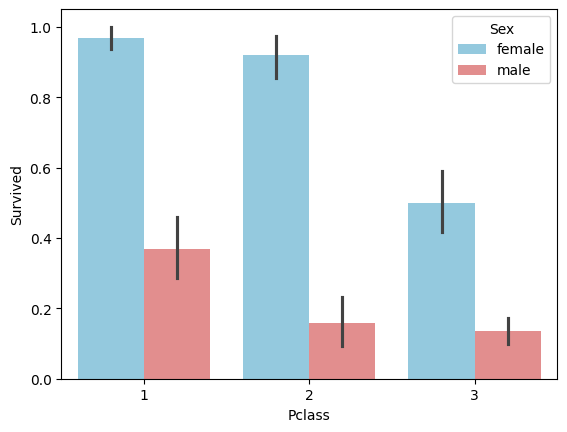

In [16]:
# Pclass와 성별에 따른 생존률 시각화
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train, palette={'male':'lightcoral', 'female':'skyblue'})
plt.show()

In [17]:
# 여성과 Pclass가 높을 수록 생존률이 높은 것을 확인
df_train.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()


,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [18]:
# 탑승객의 최소, 최대 나이와 평균 나이를 확인
print(f'Max Age : {df_train["Age"].max():.1f} Years')
print(f'Min Age : {df_train["Age"].min():.1f} Years')
print(f'Mean Age : {df_train["Age"].mean():.1f} Years')

Max Age : 80.0 Years
Min Age : 0.4 Years
Mean Age : 29.7 Years


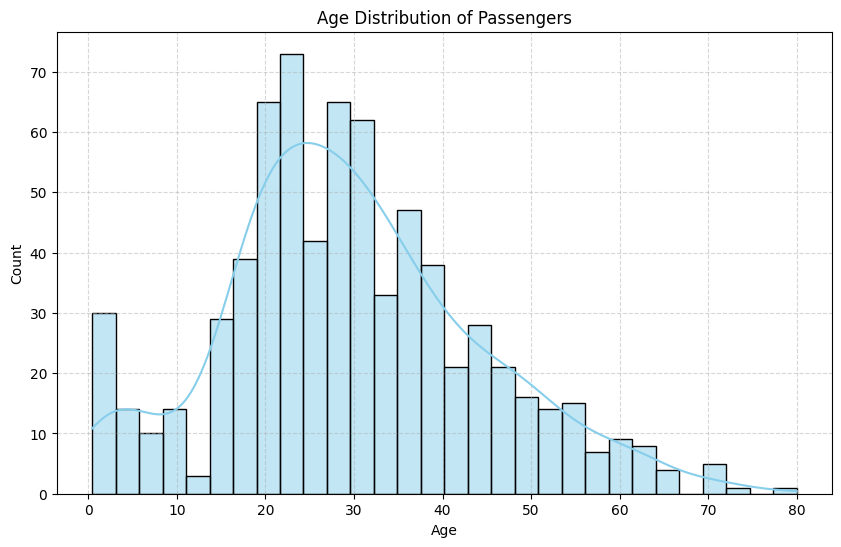

In [19]:
# 탑승객의 나이대를 히스토그램으로 확인
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

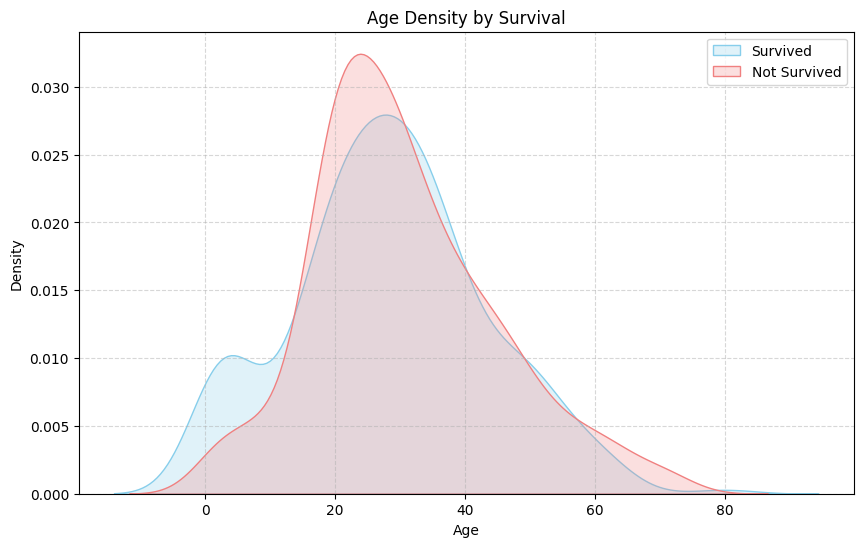

In [20]:
# 나이대 별 생존율과 사망률
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_train[df_train['Survived'] == 1]['Age'].dropna(), label='Survived', fill=True, color='skyblue')
sns.kdeplot(data=df_train[df_train['Survived'] == 0]['Age'].dropna(), label='Not Survived', fill=True, color='lightcoral')
plt.title('Age Density by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


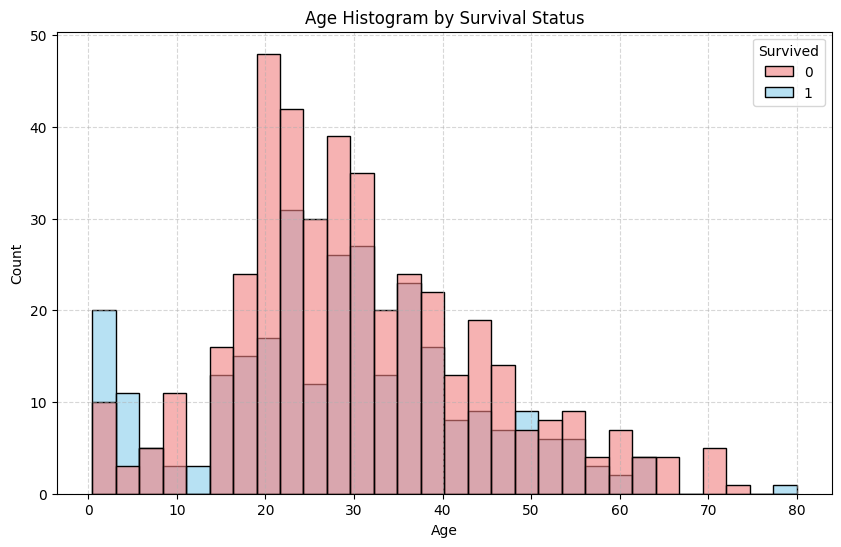

In [21]:
# 히스토그램으로 표현
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Age', hue='Survived', bins=30, kde=False, palette={0: 'lightcoral', 1: 'skyblue'}, alpha=0.6)
plt.title('Age Histogram by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Axes: xlabel='Embarked'>

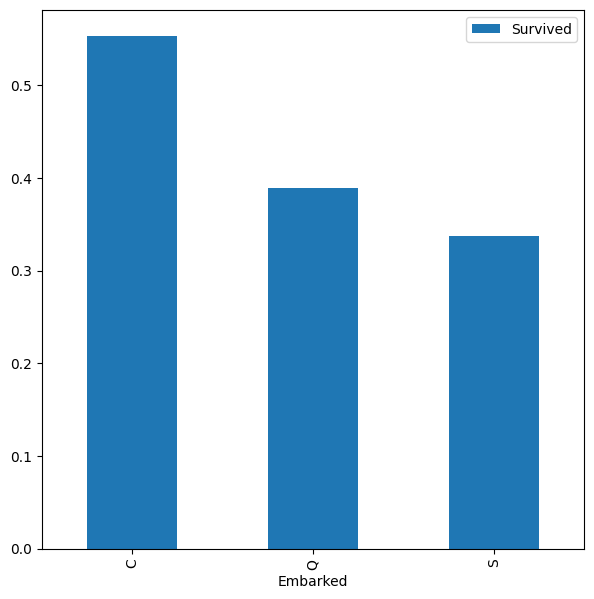

In [22]:
# 탑승 항구별 생존율
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

<ipython-input-23-d994c3944135>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_survival, x='FamilySize', y='Survived', palette='Blues_d')


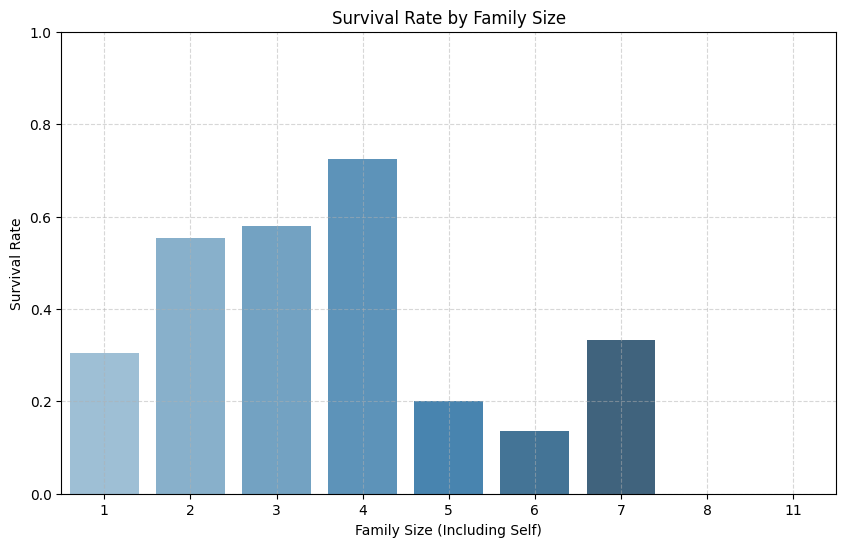

In [23]:
# 부모 자녀 배우자 형제를 모두 포함한 FamilySize 열을 새로 만들고 생존율 확인
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

family_survival = df_train.groupby('FamilySize')['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=family_survival, x='FamilySize', y='Survived', palette='Blues_d')

plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size (Including Self)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [24]:
# logistic 모델과 random forest 모델로 학습 및 평가
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# 1. FamilySize 생성
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

# 2. 필요한 feature만 선택
features = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Embarked']
X = df_train[features]
y = df_train['Survived']

# 3. 결측값 처리
# Age와 Embarked는 결측값 존재 → 채워줌
imputer = SimpleImputer(strategy='most_frequent')
X[['Age', 'Embarked']] = imputer.fit_transform(X[['Age', 'Embarked']])

# 4. 범주형 변수 인코딩
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])        # male:1, female:0
X['Embarked'] = LabelEncoder().fit_transform(X['Embarked'])  # S=2, C=0, Q=1 (예시)

# 5. 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6-1. Logistic Regression 모델
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# 6-2. Random Forest 모델
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 7. 평가 지표 출력
print("✅ Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("F1-score:", f1_score(y_test, lr_pred))

print("\n✅ Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1-score:", f1_score(y_test, rf_pred))


<ipython-input-24-d103b8b7a81e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Embarked']] = imputer.fit_transform(X[['Age', 'Embarked']])
<ipython-input-24-d103b8b7a81e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = LabelEncoder().fit_transform(X['Sex'])        # male:1, female:0
<ipython-input-24-d103b8b7a81e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

✅ Logistic Regression:
Accuracy: 0.8100558659217877
F1-score: 0.7638888888888888

✅ Random Forest:
Accuracy: 0.8212290502793296
F1-score: 0.7746478873239436


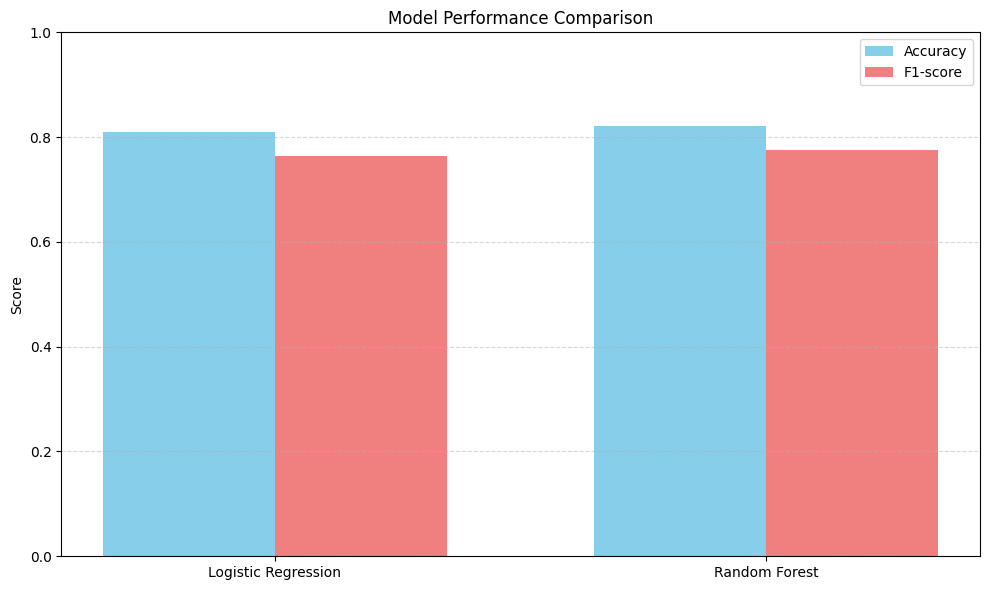

In [25]:
#성능 시각화
import matplotlib.pyplot as plt

# 평가 결과 저장
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, rf_pred)]
f1_scores = [f1_score(y_test, lr_pred), f1_score(y_test, rf_pred)]

# 시각화
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1_scores, width, label='F1-score', color='lightcoral')

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


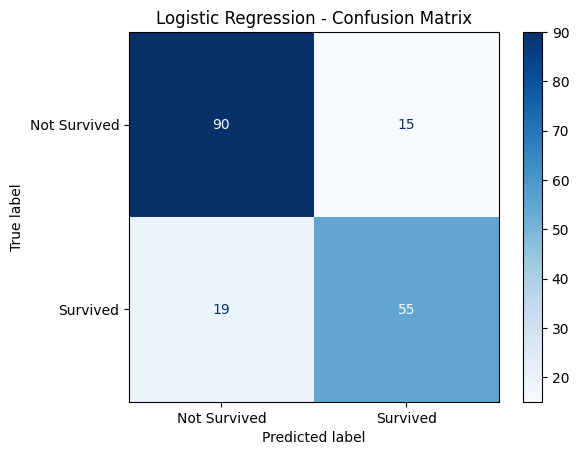

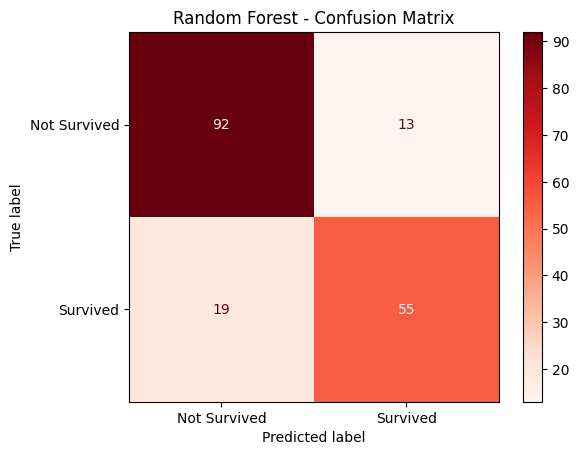

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Not Survived', 'Survived'])
disp_lr.plot(cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.grid(False)
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Survived', 'Survived'])
disp_rf.plot(cmap='Reds')
plt.title('Random Forest - Confusion Matrix')
plt.grid(False)
plt.show()


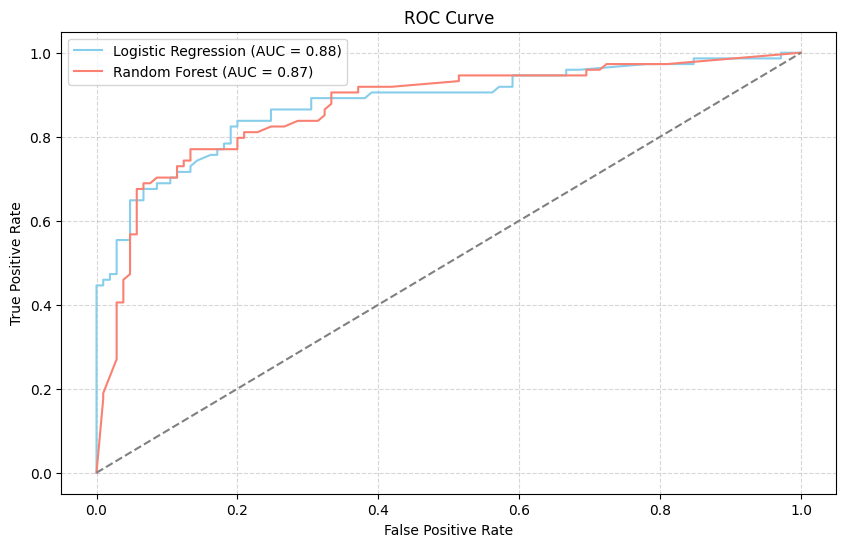

In [27]:
# ROC curve
from sklearn.metrics import roc_curve, auc

# 예측 확률
lr_proba = lr_model.predict_proba(X_test)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# ROC 계산
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)

# AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='skyblue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='salmon')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 기준선

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [31]:
# 특성 중요도 추출
importances = rf_model.feature_importances_
feature_names = X.columns


feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importance_df)


Age           0.387484
Sex           0.329970
Pclass        0.126119
FamilySize    0.112239
Embarked      0.044187
dtype: float64


<ipython-input-32-714cb9be5faf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index, palette='Blues_d')


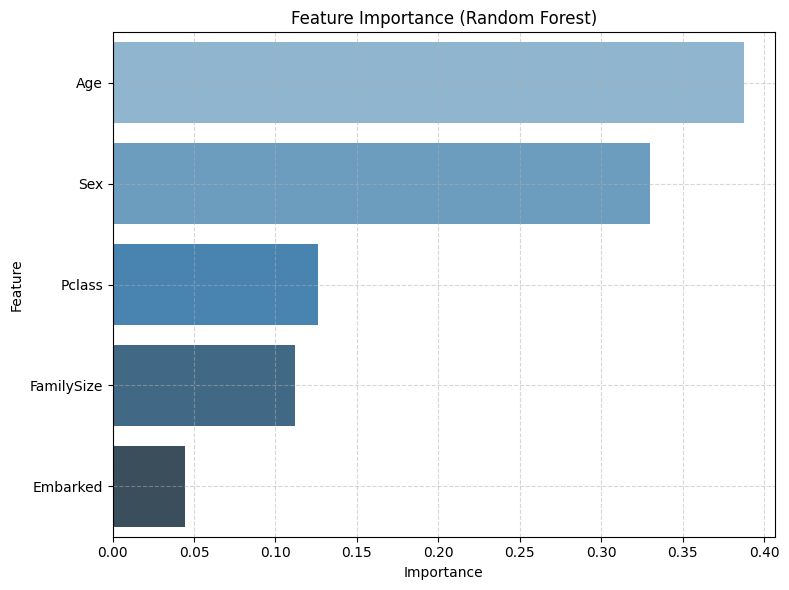

In [32]:
# 특성 중요도 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index, palette='Blues_d')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
